Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

Load Dataset

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

Step 1: EDA (head(), describe(), groupby())

In [4]:
# EDA
print("HEAD():")
print(df.head())

HEAD():
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
#describe
print("\nDESCRIBE():")
print(df.describe())


DESCRIBE():
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:
#Groupby
print("\nGROUPBY(): Mean for each class")
print(df.groupby("target").mean())


GROUPBY(): Mean for each class
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target                    
0                  0.246  
1                  1.326  
2                  2.026  


Step 2: Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, :-1]  
y = df["target"]      
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 3: Training the K-NN model on the Training set

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

Step 4: Making the Confusion Matrix & Predicting Accuracy Score

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred) * 100     

print("Confusion Matrix:\n", cm)
print("Accuracy:", acc, "%")


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 100.0 %


Step 5: Making Classification Report

In [14]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Step 6: Comparing Error Rate with the K Value

In [16]:
error_rates = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

print("Error rates for each K:")
for k, err in zip(k_values, error_rates):
    print(f"K = {k}  →  Error Rate = {err}")


Error rates for each K:
K = 1  →  Error Rate = 0.022222222222222223
K = 2  →  Error Rate = 0.022222222222222223
K = 3  →  Error Rate = 0.0
K = 4  →  Error Rate = 0.022222222222222223
K = 5  →  Error Rate = 0.0
K = 6  →  Error Rate = 0.0
K = 7  →  Error Rate = 0.0
K = 8  →  Error Rate = 0.0
K = 9  →  Error Rate = 0.0
K = 10  →  Error Rate = 0.0
K = 11  →  Error Rate = 0.0
K = 12  →  Error Rate = 0.0
K = 13  →  Error Rate = 0.0
K = 14  →  Error Rate = 0.0
K = 15  →  Error Rate = 0.0
K = 16  →  Error Rate = 0.0
K = 17  →  Error Rate = 0.0
K = 18  →  Error Rate = 0.022222222222222223
K = 19  →  Error Rate = 0.0
K = 20  →  Error Rate = 0.0


Step 7: Plot the error values against K values

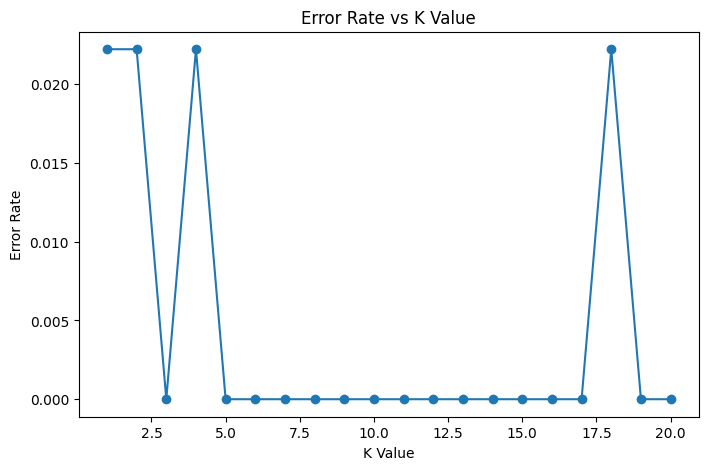

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, error_rates, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K Value")
plt.show()


Step 8: Finding best K

In [18]:
best_k = k_values[np.argmin(error_rates)]
print("Best K =", best_k)


Best K = 3


In [19]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("\n===== Confusion Matrix =====")
print(confusion_matrix(y_test, y_pred_best))

print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred_best))

print(f"\n Model Accuracy with K={best_k}: {accuracy_score(y_test, y_pred_best)*100:.2f}%")


===== Confusion Matrix =====
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

===== Classification Report =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


 Model Accuracy with K=3: 100.00%


Step 9: Visualize Test Result of KNN

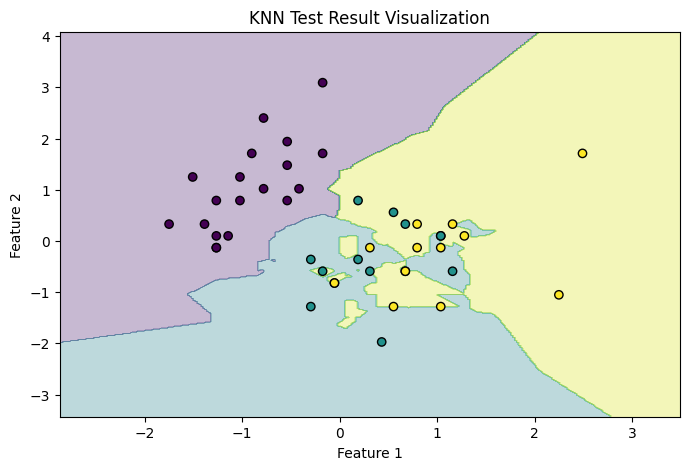

In [20]:
from matplotlib.colors import ListedColormap

X_plot = X_scaled[:, :2]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_plot, y, test_size=0.3, random_state=42
)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_p, y_train_p)

# Create meshgrid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=y_test_p, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Test Result Visualization")
plt.show()
